This notebook uses CNN to do image classification.<br>
This notebook is modified based on the "DEEP LEARNING WITH PYTORCH: A 60 MINUTE BLITZ".<br> 
(URL:  https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)

# 1. Load and normalize data

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


plane truck  ship  bird


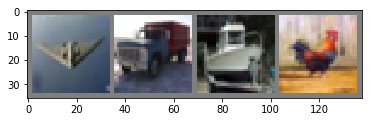

In [3]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# 2. Define a convolution neural network

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

# 3. Define a loss function and optimizer

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 4. Define a network test function

In [6]:
def testNetwork(net):
    
    # load test data
    dataiter = iter(testloader)
    images, labels = dataiter.next()  
    outputs = net(images)
    
    # evaluate the total accuracy 
    correct = 0
    total = 0
    accuracy = 0.0
    class_accuracy = []

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    
    # evaluate the accuracy of each class
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    class_accuracy = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(10):
        class_accuracy[i] = 100 * class_correct[i] / class_total[i]
        
    return accuracy, class_accuracy

# 5. Train the network and test it in every epoch

In [7]:
lossList = []
accuracyList = []
class_accuracyList = []
epochNumber = 5 # use a small number 5  during code checking; for my project, it is set as 100

for epoch in range(epochNumber):  

    # training the network
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 12500 == 12499:  
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 12500))
            lossList.append(running_loss / 12500)
            running_loss = 0.0
        
        
    # call the test function
    with torch.no_grad():
        accuracy, class_accuracy = testNetwork(net)
        print("Total accuracy (%): ", accuracy)
        print("Class accuracy (%): ", class_accuracy)
        accuracyList.append(accuracy)
        class_accuracyList.append(class_accuracy)

#     !!! The writing-to-file part is commented to avoid override of the existing output (epoch 1-100) 
#     # write loss, accuracy and class_accuracy data as csv files
#     np.savetxt("./CNN/lossList.csv",lossList, delimiter=",", fmt='%s')
#     np.savetxt("./CNN/accuracyList.csv",accuracyList, delimiter=",", fmt='%s')
#     np.savetxt("./CNN/class_accuracyList.csv",class_accuracyList, delimiter=",", fmt='%s')
    

print('Finished Training')

[1, 12500] loss: 1.734
Total accuracy (%):  47.84
Class accuracy (%):  [49.4, 73.5, 53.2, 30.5, 8.9, 33.8, 75.6, 46.8, 51.6, 55.1]
[2, 12500] loss: 1.346
Total accuracy (%):  54.26
Class accuracy (%):  [55.4, 76.6, 37.2, 27.1, 38.6, 58.0, 58.0, 62.2, 86.3, 43.2]
[3, 12500] loss: 1.203
Total accuracy (%):  56.72
Class accuracy (%):  [56.9, 79.9, 30.6, 29.2, 52.3, 56.1, 68.3, 70.3, 86.5, 37.1]
[4, 12500] loss: 1.108
Total accuracy (%):  59.44
Class accuracy (%):  [66.3, 82.2, 31.8, 58.4, 53.3, 31.1, 81.6, 50.7, 79.7, 59.3]


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x12eacf278>>
Traceback (most recent call last):
  File "/Users/jianyuandeng/miniconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/Users/jianyuandeng/miniconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/Users/jianyuandeng/miniconda3/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/Users/jianyuandeng/miniconda3/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 167, in rebuild_storage_filename
    storage = cls._new_shared_filename(manager, handle, size)
RuntimeError: Interrupted system call at /Users/soumith/miniconda2/conda-bld/pytorch_1532623076075/work/torch/lib/libshm/core.cpp:99


[5, 12500] loss: 1.036
Total accuracy (%):  60.12
Class accuracy (%):  [42.5, 70.9, 51.9, 44.2, 56.9, 42.4, 75.3, 64.1, 81.9, 71.1]
Finished Training
